In [1]:
# Import classes
import numpy as np
from idtxl.bivariate_te import BivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Bivariate Transfer Entropy seems to behave exactly the same way as Bivariate Mutual Information for the example of cycled data

In [2]:
# This function will cycle datapoints by n steps forwards
def cycle(data, n):
    if n == 0:
        return data
    else:
        return np.hstack((data[n:], data[:n]))

    
#######################
# Initialize
#######################
# a) Create random data
NDATA = 1000
dataNP = np.zeros((2, NDATA))
dataNP[0,:] = np.random.normal(0, 1, NDATA)

# b) Initialise analysis object and define settings
network_analysis = BivariateTE()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 5,
            'min_lag_sources': 0,
           'verbose' : False}

#######################
# Run analysis
#######################

cycleList = list(range(-6, 7))

results = []
for iCycle in cycleList:
    # Create 2nd dataset, which is a noisy cycle of the first one
    dataNP[1,:] = cycle(2*np.copy(dataNP[0,:]), iCycle) + np.random.normal(0, 1, NDATA)
    data = Data(dataNP, dim_order='ps')
    
    # Run analysis of the network
    results.append(network_analysis.analyse_network(settings=settings, data=data))

#######################
# Print and plot results
#######################

for iCycle, rez in zip(cycleList, results):
    print(":: For cycle =", iCycle)
    rez.print_edge_list(weights='max_te_lag', fdr=False)
    for i in range(2):
        rezThis = rez.get_single_target(i, fdr=False)
        print("For var", i, "sources", rezThis['sources_tested'], 'te', rezThis['te'], 'p', rezThis['selected_sources_pval'])

# print(results.get_single_target(0, fdr=False))
# print(results.settings)
# print(results.data_properties)

# d) Plot inferred network to console and via matplotlib
# results.print_edge_list(weights='max_te_lag', fdr=False)
# plot_network(results=results, weights='max_te_lag', fdr=False)
# plt.show()

Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates

---------------------------- (3) prune candidates

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates

---------------------------- (3) prune candidates

---------------------------- (4) final statistics
No links in final results ...
Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

----------------------------


---------------------------- (3) prune candidates
selected vars sources [(1, 3)]
selected candidates current source: [(1, 2)]

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates

---------------------------- (3) prune candidates

---------------------------- (4) final statistics
Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates

---------------------------- (3) prune candidates
selected vars sources [(1, 2)]
selected candidates current source: [(1, 3)]

---------------------------- (4) final statistics

---------------------------- (1) include t

Adding data with properties: 5 processes, 1000 samples, 5 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4]

Target: 0 - testing sources [1, 2, 3, 4]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set current source: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
testing candidate: (1, 4) maximum statistic, n_perm: 200
 -- not significant
candidate set current source: [(2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
testing candidate: (2, 5) maximum statistic, n_perm: 200
 -- not significant
candidate set curr

final source samples: [(1, 3), (1, 2), (1, 1), (4, 5), (4, 1), (4, 2), (4, 3)]
final target samples: [(3, 4), (3, 1), (3, 5), (3, 2), (3, 3)]



####### analysing target with index 4 from list [0, 1, 2, 3, 4]

Target: 4 - testing sources [0, 1, 2, 3]

---------------------------- (1) include target candidates
candidate set: [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5)]
testing candidate: (4, 1) 
maximum statistic, n_perm: 200
testing candidate: (4, 4) maximum statistic, n_perm: 200
testing candidate: (4, 2) maximum statistic, n_perm: 200
testing candidate: (4, 3) maximum statistic, n_perm: 200
testing candidate: (4, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set current source: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) maximum statistic, n_perm: 200
 -- not significant
candidate set current source: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
testing candidate: (1, 1) maximum statistic, n_perm: 200
testing can

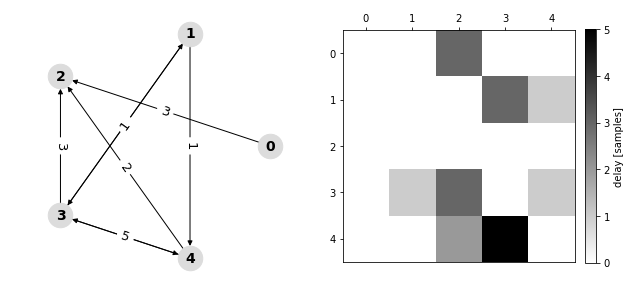

In [3]:
# a) Generate test data
data = Data()
data.generate_mute_data(n_samples=1000, n_replications=5)

# b) Initialise analysis object and define settings
network_analysis = BivariateTE()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 5,
            'min_lag_sources': 1}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=data)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()

NameError: name 'N_NODE' is not defined